In [765]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [766]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#pd.set_option('display.max_rows', 500)

In [767]:
nextDays = 100
def createDataFrame(stock, start, end):
    df = stock.history(start=start, end=end)

    df["Change"] = df["Close"].pct_change() # 전날 대비 변화율

    # add next 2 days' average
    #df["Next2"] = df["Close"].rolling(window=2).mean().shift(-2)

    # add next 5 days' average
    df["Next"] = df["Close"].rolling(window=nextDays).mean().shift(-nextDays)

    # add 10 days later
    df["Next"] = (df["Close"].shift(-nextDays+1) + df["Close"].shift(-nextDays) + df["Close"].shift(-nextDays-1)) / 3




    # df.index = pd.to_datetime(df.index).strftime("%Y-%m-%d") # 날짜 형식 간단하게 만들기
	
    # 지표 데이터
    # df2 = pd.read_csv("/Users/ryujonghyeok/Jonghyeok/Sejong/SAI/자료모음집.csv") 
    # df = pd.merge(df, df2, on="Date") """

    # df.set_index("Date", inplace=True)

    return df

In [768]:
# Define the stock
stock = yf.Ticker("SPY")

# Create a dataframe from 'start' to 'end'
start = "2009-01-01"
end = "2020-12-31"

df = createDataFrame(stock, start, end)
df = df[["Close", "Change", "Next"]]
df

,Close,Change,Next
Date,,,
2009-01-02 00:00:00-05:00,69.635735,NaN,68.685585
2009-01-05 00:00:00-05:00,69.553345,-0.001183,69.968165
2009-01-06 00:00:00-05:00,70.017776,0.006677,70.956512
2009-01-07 00:00:00-05:00,67.920311,-0.029956,71.238174
2009-01-08 00:00:00-05:00,68.197449,0.004080,71.177816
...,...,...,...
2020-12-23 00:00:00-05:00,350.511078,0.000898,NaN
2020-12-24 00:00:00-05:00,351.874756,0.003891,NaN
2020-12-28 00:00:00-05:00,354.897583,0.008591,NaN


In [769]:
# FEDFUNDS: Federal Funds Effective Rate
# DFEDTARU: Federal Funds Target Range - Upper Limit
# CPIAUCSL: Consumer Price Index for All Urban Consumers: All Items in U.S. City Average
# DGS10: Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis


# access CPI.csv file in 'data' folder
cpiaucsl = pd.read_csv('data/CPIAUCSL.csv')
dfedtaru = pd.read_csv('data/DFEDTARU.csv')
dgs10 = pd.read_csv('data/DGS10.csv')
fedfunds = pd.read_csv('data/FEDFUNDS.csv')
unrate = pd.read_csv('data/UNRATE.csv')


# convert 'DATE' column to datetime
cpiaucsl['DATE'] = pd.to_datetime(cpiaucsl['DATE'])
dfedtaru['DATE'] = pd.to_datetime(dfedtaru['DATE'])
dgs10['DATE'] = pd.to_datetime(dgs10['DATE'])
fedfunds['DATE'] = pd.to_datetime(fedfunds['DATE'])
unrate['DATE'] = pd.to_datetime(unrate['DATE'])

# set start and end date with dataframe data type
start = pd.to_datetime(start)
end = pd.to_datetime(end)

# combine fed, cpi, treasury using merge from start to end
data = pd.merge(fedfunds, cpiaucsl, on='DATE', how='outer')
data = pd.merge(data, dfedtaru, on='DATE', how='outer')
data = pd.merge(data, dgs10, on='DATE', how='outer')
data = pd.merge(data, unrate, on='DATE', how='outer')
data = data[(data['DATE'] >= start) & (data['DATE'] <= end)]
data = data.replace(".", np.NaN)
data = data.ffill()

data.index = data['DATE']
data = data.drop(columns=['DATE'])

data

,FEDFUNDS,CPIAUCSL,DFEDTARU,DGS10,UNRATE
DATE,,,,,
2009-01-01,0.15,211.933,0.25,NaN,7.8
2009-01-02,0.15,211.933,0.25,2.46,7.8
2009-01-03,0.15,211.933,0.25,2.46,7.8
2009-01-04,0.15,211.933,0.25,2.46,7.8
2009-01-05,0.15,211.933,0.25,2.49,7.8
...,...,...,...,...,...
2020-12-27,0.09,262.005,0.25,0.94,6.7
2020-12-28,0.09,262.005,0.25,0.94,6.7
2020-12-29,0.09,262.005,0.25,0.94,6.7


In [770]:
# Convert 'df' to tz-aware dataframe
df = df.tz_localize(None)

# Combine 'df' and 'data' dataframe respect to 'DATE' as index
df = pd.merge(df, data, left_index=True, right_index=True, how='inner')

df

,Close,Change,Next,FEDFUNDS,CPIAUCSL,DFEDTARU,DGS10,UNRATE
2009-01-02,69.635735,NaN,68.685585,0.15,211.933,0.25,2.46,7.8
2009-01-05,69.553345,-0.001183,69.968165,0.15,211.933,0.25,2.49,7.8
2009-01-06,70.017776,0.006677,70.956512,0.15,211.933,0.25,2.51,7.8
2009-01-07,67.920311,-0.029956,71.238174,0.15,211.933,0.25,2.52,7.8
2009-01-08,68.197449,0.004080,71.177816,0.15,211.933,0.25,2.47,7.8
...,...,...,...,...,...,...,...,...
2020-12-23,350.511078,0.000898,NaN,0.09,262.005,0.25,0.96,6.7
2020-12-24,351.874756,0.003891,NaN,0.09,262.005,0.25,0.94,6.7
2020-12-28,354.897583,0.008591,NaN,0.09,262.005,0.25,0.94,6.7
2020-12-29,354.220581,-0.001908,NaN,0.09,262.005,0.25,0.94,6.7


In [771]:
# import the scikit learn linear regression model
from sklearn.linear_model import LinearRegression

# create a linear regression model between 'Close' and 'CPIAUCSL', 'DFEDTARU', 'DGS10', 'FEDFUNDS', 'UNRATE
model = LinearRegression()

# x = df[['CPIAUCSL', 'DFEDTARU', 'DGS10', 'FEDFUNDS', 'UNRATE']]
x = df.iloc[:-nextDays-1][['CPIAUCSL', 'DFEDTARU', 'DGS10', 'FEDFUNDS', 'UNRATE']]

# y = df['Close']
y = df.iloc[:-nextDays-1]['Next']


model.fit(x, y) # train the model

# print the model coefficients 
print(model.coef_)
print(model.intercept_)
print(model.score(x, y))

""" # add predicted 'Close' values to the dataframe
df['Predicted Close'] = model.predict(x)

# plot the 'Close' and 'Predicted Close' values
plt.plot(df.index, y, label='Close')
plt.plot(df.index, model.predict(x), label='Predicted Close')
plt.legend()
plt.show() """

[  5.69925028 -48.076492     1.56366513  53.42014896   4.19152599]
-1199.3135901021014
0.9521932152792247


" # add predicted 'Close' values to the dataframe\ndf['Predicted Close'] = model.predict(x)\n\n# plot the 'Close' and 'Predicted Close' values\nplt.plot(df.index, y, label='Close')\nplt.plot(df.index, model.predict(x), label='Predicted Close')\nplt.legend()\nplt.show() "

In [772]:
df

,Close,Change,Next,FEDFUNDS,CPIAUCSL,DFEDTARU,DGS10,UNRATE
2009-01-02,69.635735,NaN,68.685585,0.15,211.933,0.25,2.46,7.8
2009-01-05,69.553345,-0.001183,69.968165,0.15,211.933,0.25,2.49,7.8
2009-01-06,70.017776,0.006677,70.956512,0.15,211.933,0.25,2.51,7.8
2009-01-07,67.920311,-0.029956,71.238174,0.15,211.933,0.25,2.52,7.8
2009-01-08,68.197449,0.004080,71.177816,0.15,211.933,0.25,2.47,7.8
...,...,...,...,...,...,...,...,...
2020-12-23,350.511078,0.000898,NaN,0.09,262.005,0.25,0.96,6.7
2020-12-24,351.874756,0.003891,NaN,0.09,262.005,0.25,0.94,6.7
2020-12-28,354.897583,0.008591,NaN,0.09,262.005,0.25,0.94,6.7
2020-12-29,354.220581,-0.001908,NaN,0.09,262.005,0.25,0.94,6.7


In [773]:
def buy(현금보유량, 주식보유량, 현재주가):
    if 주식보유량 == 0:
        주식보유량 = 현금보유량 // 현재주가
        현금보유량 -= 주식보유량 * 현재주가
        # print(f"Bought at {현재주가} with {주식보유량} stocks")
    return 현금보유량, 주식보유량


def sell(현금보유량, 주식보유량, 현재주가):
    if 주식보유량 > 0:
        현금보유량 += 주식보유량 * 현재주가
        주식보유량 = 0
        # print(f"Sold at {현재주가} with {주식보유량} stocks")
    return 현금보유량, 주식보유량

def total_asset(현금보유량, 주식보유량, 현재주가):
    return 현금보유량 + 주식보유량 * 현재주가

In [774]:
def score_calculate_og(i):
    # 4.76130047  -2.86062042 -31.53250228  -8.93819761  -6.0887131
    # x = df[['CPIAUCSL', 'DFEDTARU', 'DGS10', 'FEDFUNDS', 'UNRATE']]

    d_cpiaucsl = float(df.iloc[i]["CPIAUCSL"])
    d_dfedtaru = float(df.iloc[i]["DFEDTARU"])
    d_dgs10 = float(df.iloc[i]["DGS10"])
    d_fedfunds = float(df.iloc[i]["FEDFUNDS"])
    d_unrate = float(df.iloc[i]["UNRATE"])

    # [  3.31071085   5.16950057  -2.57965745 -19.2770091  -34.5469385 ]
    # -414.4216677959783

    score = 4.76130047 * d_cpiaucsl - 2.86062042 * d_dfedtaru - 31.53250228 * d_dgs10 - 8.93819761 * d_fedfunds - 6.0887131 * d_unrate -838.334901756302
    score = 3.31071085 * d_cpiaucsl + 5.16950057 * d_dfedtaru - 2.57965745 * d_dgs10 - 19.2770091 * d_fedfunds - 34.5469385 * d_unrate -414.4216677959783

    # [  5.87635666 -20.95913652   8.94047031  19.06006088   2.26623342]
    # -1252.8649401375355
    score = 5.87635666 * d_cpiaucsl - 20.95913652 * d_dfedtaru + 8.94047031 * d_dgs10 + 19.06006088 * d_fedfunds + 2.26623342 * d_unrate -1252.8649401375355

    return score

def score_calculate(i):
    # [  4.33353229  -2.0621398   -5.18311157 -15.21641093 -46.91571719]
    # -609.9466426959245


    d_cpiaucsl = float(df.iloc[i]["CPIAUCSL"])
    d_dfedtaru = float(df.iloc[i]["DFEDTARU"])
    d_dgs10 = float(df.iloc[i]["DGS10"])
    d_fedfunds = float(df.iloc[i]["FEDFUNDS"])
    d_unrate = float(df.iloc[i]["UNRATE"])

    # [  5.69925028 -48.076492     1.56366513  53.42014896   4.19152599]
    # -1199.3135901021014

    score = 4.33353229 * d_cpiaucsl - 2.0621398 * d_dfedtaru - 5.18311157 * d_dgs10 - 15.21641093 * d_fedfunds - 46.91571719 * d_unrate -609.9466426959245
    score = 5.87635666 * d_cpiaucsl - 20.95913652 * d_dfedtaru + 8.94047031 * d_dgs10 + 19.06006088 * d_fedfunds + 2.26623342 * d_unrate -1252.8649401375355
    score = 5.55300228 * d_cpiaucsl - 32.33691206 * d_dfedtaru + 4.82001601 * d_dgs10 + 36.57436438 * d_fedfunds + 2.97079608 * d_unrate -1170.3482155841334
    score = 5.44129951 * d_cpiaucsl - 21.80079886 * d_dfedtaru + 8.01323566 * d_dgs10 + 24.88876588 * d_fedfunds + 1.66806938 * d_unrate -1147.2719098050673 # Result of SPY 20090101-20201231 and to the avg of 9, 10, 11th day
    score = 5.69925028 * d_cpiaucsl - 48.076492 * d_dfedtaru + 1.56366513 * d_dgs10 + 53.42014896 * d_fedfunds + 4.19152599 * d_unrate -1199.3135901021014 # Result of SPY20090101-20201231 and to the avg of 99, 100, 101st day          

    return score


score_plt = []
# 복합적인 요소를 분석하여 일정 조건에 따라 매수 및 매도 반복
def strategy_score(df):
    global score_plt

    현금보유량 = 1000000
    주식보유량 = 0

    현금보유량, 주식보유량 = buy(현금보유량, 주식보유량, df.iloc[0].Close)
    for i in range(len(df)):
        
        # 점수 계산하기
        score = score_calculate(i)

        현재주가 = df.iloc[i].Close
        
        # 점수가 일정 기준보다 클 때 매수하기
        
        if  현재주가 < score * 1.2:
            현금보유량, 주식보유량 = buy(현금보유량, 주식보유량, 현재주가)

        # 점수가 일정 기준보다 작을 때 매도하기
        # if x  in "score * x" is greater than 1, then it is much easier to sell the stock
        elif 현재주가 > score * 1.05:
            현금보유량, 주식보유량 = sell(현금보유량, 주식보유량, 현재주가)

        score_plt.append(total_asset(현금보유량, 주식보유량, 현재주가))

    현금보유량, 주식보유량 = sell(현금보유량, 주식보유량, df.iloc[-1].Close)


    print(f"Score 계산 - 현금보유량: {현금보유량:.2f} profit: {(현금보유량-1000000)/1000000*100:.2f}%")


In [775]:
buyAndHold_plt = []
# 시작시점에 매수 후 종료시점에 매도
def strategy_buyAndHold(df):
    global buyAndHold_plt

    현금보유량 = 1000000
    주식보유량 = 0

    현금보유량, 주식보유량 = buy(현금보유량, 주식보유량, df.iloc[0].Close)
    
    buyAndHold_plt = []
    for i in range(1, len(df)-1):
        buyAndHold_plt.append(total_asset(현금보유량, 주식보유량, df.iloc[i].Close))
    
    현금보유량 += 주식보유량 * df.iloc[-1].Close

    print(f"Hold - 현금보유량: {현금보유량:.2f}, profit: {(현금보유량-1000000)/1000000*100:.2f}%")


In [776]:
difference_plt = []
# 최고점 대비 일정 비율 하락하면 매도, 최저점 대비 일정 비율 상승하면 매수
def strategy_difference(df):
    global difference_plt
    현금보유량 = 1000000
    주식보유량 = 0
    dif1 = 0.36 # 일정 비율 하락하는 정도 🤑
    dif2 = 0.02 # 일정 비율 상승하는 정도 🤑

    minimum = float('inf')
    maximum = float('-inf')

    for i in range(2, len(df)):
        price = df.iloc[i].Close
        if price > maximum:
            maximum = price
        elif price < minimum:
            minimum = price
        if 주식보유량 > 0 and price < maximum * (1-dif1):
        #print(f"Sold at {price(hist, i)}")
            현금보유량, 주식보유량 = sell(현금보유량, 주식보유량, price)
            maximum = float('-inf')
        elif 주식보유량 == 0 and price > minimum * (1+dif2):
            #print(f"Bought at {price(hist, i)}")
            현금보유량, 주식보유량 = buy(현금보유량, 주식보유량, price)
            minimum = float('inf')

        difference_plt.append(total_asset(현금보유량, 주식보유량, price))

    현금보유량 += 주식보유량 * df.iloc[-1].Close
    주식보유량 = 0

    print(f"Difference - 현금보유량: {현금보유량:.2f}, profit: {(현금보유량-1000000)/1000000*100:.2f}%")

In [777]:
""" import requests
import datetime
import pandas as pd
from bs4 import BeautifulSoup

requests.packages.urllib3.disable_warnings()

def scraper(url):
    resp = requests.get(url, verify=False)
    page = resp.text
    soup = BeautifulSoup(page, "html.parser")

    body_copy = str(soup.find_all("p", {"class": "body-copy"}))
    body_copy = body_copy.replace('<p class="body-copy">', '')
    body_copy = body_copy.replace('</p>', '')

    return body_copy


for i in range(1, len(df)):
    a = df.iloc[i].name
    a = a.strftime("%b-%d-%Y")
    a = str(a).lower()
    url = f"https://www.investrade.com/market-review-{a}/"
    content = scraper(url)
    df.loc[df.index[i], "Title"] = content

df.tail()

 """

' import requests\nimport datetime\nimport pandas as pd\nfrom bs4 import BeautifulSoup\n\nrequests.packages.urllib3.disable_warnings()\n\ndef scraper(url):\n    resp = requests.get(url, verify=False)\n    page = resp.text\n    soup = BeautifulSoup(page, "html.parser")\n\n    body_copy = str(soup.find_all("p", {"class": "body-copy"}))\n    body_copy = body_copy.replace(\'<p class="body-copy">\', \'\')\n    body_copy = body_copy.replace(\'</p>\', \'\')\n\n    return body_copy\n\n\nfor i in range(1, len(df)):\n    a = df.iloc[i].name\n    a = a.strftime("%b-%d-%Y")\n    a = str(a).lower()\n    url = f"https://www.investrade.com/market-review-{a}/"\n    content = scraper(url)\n    df.loc[df.index[i], "Title"] = content\n\ndf.tail()\n\n '

Hold - 현금보유량: 5093896.40, profit: 409.39%
Difference - 현금보유량: 5633807.12, profit: 463.38%
Score 계산 - 현금보유량: 6013693.52 profit: 501.37%


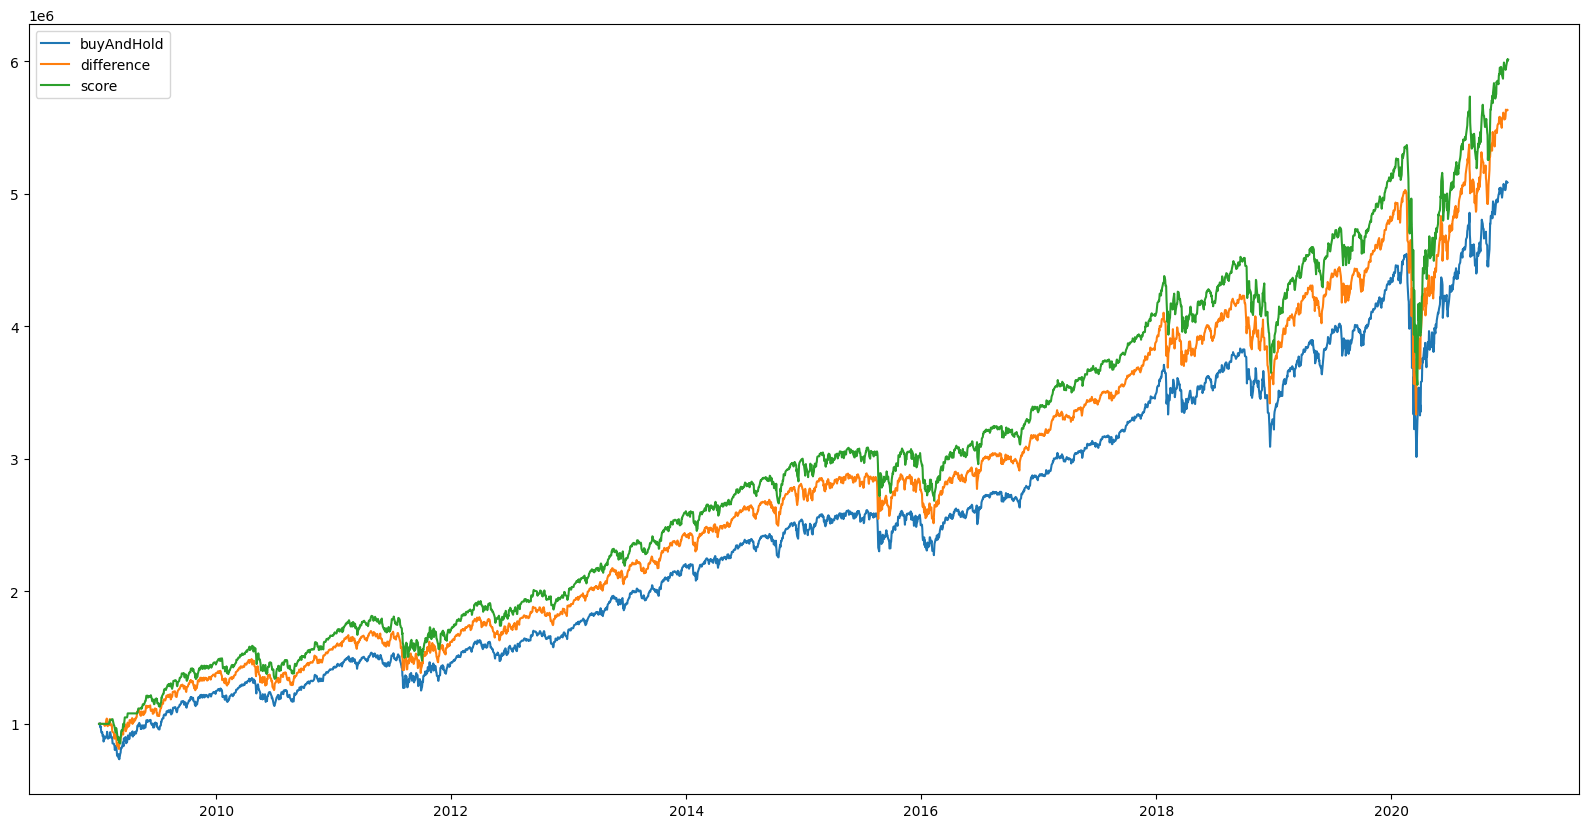

In [778]:
strategy_buyAndHold(df)
strategy_difference(df)
strategy_score(df)

# 그래프 그리기
plt.figure(figsize=(20, 10))
plt.plot(df.index[:-2], buyAndHold_plt, label="buyAndHold")
plt.plot(df.index[:-2], difference_plt, label="difference")
plt.plot(df.index, score_plt, label="score")
plt.legend()
plt.show()